In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [38]:
df = pd.read_csv("soccer_player.csv")
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'League', 'player', 'Substitution ', 'xG Per Avg Match',
       'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match',
       'value', 'nationality', 'position', 'squad', 'goals', 'goals_per_shot',
       'passes_completed', 'assisted_shots', 'passes_blocked', 'touches',
       'height', 'assists', 'games_starts', 'minutes'],
      dtype='object')


## I choose which features I want to implement into the multi linear regression model.



In [39]:
target = 'value'
features = ['xG Per Avg Match', 'Shots', 'OnTarget',
          'Shots Per Avg Match', 'On Target Per Avg Match',
            'goals', 'goals_per_shot', 'assists',
            'passes_completed', 'assisted_shots',
            'touches', 'height', 'games_starts', 'minutes']

# Feature matrix (X)
X = df[features].to_numpy()

# Target vector (y)
y = df[target].to_numpy().reshape(-1, 1)


## Normalize Features

In [40]:

def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X, mu, sigma = feature_normalize(X)


## Calculate total cost

In [41]:
def compute_cost(X, y, w, b):
    """
    Computes J(w,b) = (1/(2m)) * Σ(f_wb(x^(i)) - y^(i))^2
    """
    m = X.shape[0]
    total_cost = 0
    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(w, X[i]) + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
        
    total_cost = cost_sum/(2*m)
    return total_cost
# Verify my computations
print("Initial Cost:", compute_cost(X, y, w=np.zeros(X.shape[1]), b=0))


Initial Cost: [7.97470408e+14]


## Then I calculate dj_dw and dj_db

In [42]:
def compute_gradient(x, y, w, b):
    m, n = x.shape

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [43]:
# Test Gradient

w = np.zeros(X.shape[1])
b = 0

alpha = 0.01
for i in range(10):
    dj_dw, dj_db = compute_gradient(X, y, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db
    print(compute_cost(X, y, w, b))



[7.78152075e+14]
[7.6005852e+14]
[7.43084156e+14]
[7.27133398e+14]
[7.12119691e+14]
[6.97964632e+14]
[6.84597176e+14]
[6.71952927e+14]
[6.59973493e+14]
[6.48605904e+14]


# Function for Gradient Descent

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m, n = X.shape
    w = copy.deepcopy(w_in)
    b = b_in

    J_history = []
    w_history = []

    for i in range(num_iters):

        #Compute Gradients
        dj_dw, dj_db = gradient_function(X, y, w, b)

        #Update w and b
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        #Record cost to graph
        if i < 100000:
            cost = cost_function(X, y, w, b)
            J_history.append(cost)
        #Record & print progress every 10% of iterations
        if i % max(1, math.ceil(num_iters / 10)) == 0:
            w_history.append(copy.deepcopy(w))
            print(f"Iteration {i:4}: Cost {J_history[-1]:.5e}")
    return w, b, J_history, w_history


In [48]:
n = X.shape[1]        
w_init = np.zeros(n)  
b_init = 0            
alpha = 1e-1          # Learning Rate
num_iters = 10000       # gradient descent steps

Iteration    0: Cost 6.33108e+14
Iteration 1000: Cost 2.37180e+14
Iteration 2000: Cost 2.35017e+14
Iteration 3000: Cost 2.34365e+14
Iteration 4000: Cost 2.34168e+14
Iteration 5000: Cost 2.34108e+14
Iteration 6000: Cost 2.34090e+14
Iteration 7000: Cost 2.34085e+14
Iteration 8000: Cost 2.34083e+14
Iteration 9000: Cost 2.34082e+14


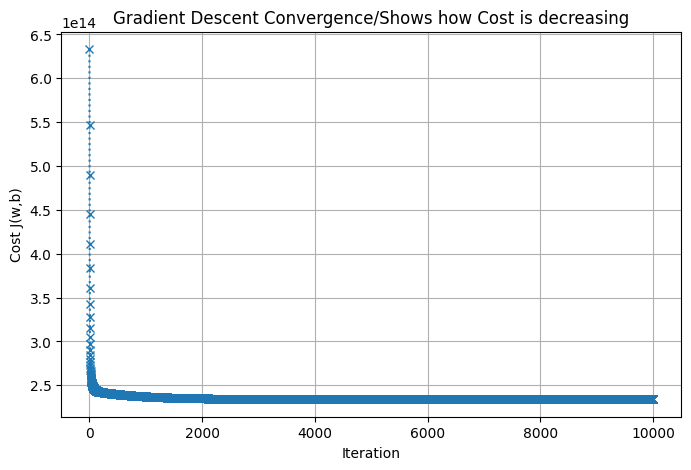

In [61]:
w_final, b_final, J_hist, w_hist = gradient_descent(
    X, y.flatten(), w_init, b_init,   # flatten y to (m,)
    cost_function=compute_cost,
    gradient_function=compute_gradient,
    alpha=alpha,
    num_iters=num_iters
)
plt.figure(figsize=(8,5))
plt.plot(range(len(J_hist)), J_hist, marker='x', linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent Convergence/Shows how Cost is decreasing")
plt.grid(True)
plt.savefig("plots/gradient_descent_convergence.png", dpi=300, bbox_inches='tight')
plt.show()



# I can now test for the predicted market values of top players in their prime

# Messi in his best season (arguably 2011-2012) and Ronaldo (arguably 2017-2018)

In [62]:
# Messi's stats
messi_2011 = np.array([[1.35, 278, 135, 4.63, 2.25, 73, 0.263, 30, 3700, 125, 2008, 170, 37, 3269]])

# Normalize using training set statistics
messi_2011_norm = (messi_2011 - mu) / sigma

y_pred_messi_2011 = np.dot(messi_2011_norm, w_final) + b_final

# Predicted value as scalar
y_pred_scalar = y_pred_messi_2011[0]

# Convert to million Euros
y_pred_million_messi = y_pred_scalar / 1_000_000

# Print nicely
print(f"Predicted 2011-2012 Messi market value: {y_pred_million_messi:.2f} million Euros")
print(f"Actual 2011-2012 Messi market value: 150-200 million Euros")

Predicted 2011-2012 Messi market value: 258.57 million Euros
Actual 2011-2012 Messi market value: 150-200 million Euros


In [63]:
# Ronaldo's best season (2017-2018)
# Ronaldo's stats
ronaldo_2017 = np.array([[0.7, 260, 111, 4.81, 2.06, 44, 0.169, 8, 1210, 53, 1174, 188, 44, 3670]])

# Normalize using the training set statistics
ronaldo_2017_norm = (ronaldo_2017 - mu) / sigma

# Predict market value
y_pred_ronaldo_2017 = np.dot(ronaldo_2017_norm, w_final) + b_final

# Convert to million Euros
y_pred_million_ronaldo = y_pred_ronaldo_2017[0] / 1_000_000  # extract scalar from array

# Print nicely
print(f"Predicted 2017-2018 Ronaldo market value: {y_pred_million_ronaldo:.2f} million Euros")
print(f"Actual 2017-2018 Ronaldo market value: ~135 million Euros")

Predicted 2017-2018 Ronaldo market value: 220.62 million Euros
Actual 2017-2018 Ronaldo market value: ~135 million Euros


# We can compare these values to the Predicted and Actual values of their 2019-2020 seasons respectively


In [64]:
# Messi 2019-2020
messi_2019 = np.array([[0.63, 39, 19, 4.5, 2.19, 25, 0.13, 21, 1700, 86, 2614, 170, 32, 2880]])
messi_2019_norm = (messi_2019 - mu) / sigma
y_pred_messi_2019 = np.dot(messi_2019_norm, w_final) + b_final
y_pred_million_messi_2019 = y_pred_messi_2019[0] / 1_000_000

print(f"Predicted 2019-2020 Messi market value: {y_pred_million_messi_2019:.2f} million Euros")
print(f"Actual 2019-2020 Messi market value: 112 million Euros")

Predicted 2019-2020 Messi market value: 106.10 million Euros
Actual 2019-2020 Messi market value: 112 million Euros


### Observation: The model may underestimate Messi's value due to missing features (playmaking/vision) that can't be captured by stats or the model.


In [65]:
# Ronaldo 2019-2020
ronaldo_2019 = np.array([[1.27, 26, 13, 6.22, 3.11, 31, 0.1, 5, 1086, 50, 1761, 187, 33, 2917]])
ronaldo_2019_norm = (ronaldo_2019 - mu) / sigma
y_pred_ronaldo_2019 = np.dot(ronaldo_2019_norm, w_final) + b_final
y_pred_million_ronaldo_2019 = y_pred_ronaldo_2019[0] / 1_000_000


print(f"Predicted 2019-2020 Ronaldo market value: {y_pred_million_ronaldo_2019:.2f} million Euros")
print(f"Actual 2019-2020 Ronaldo market value: 60 million Euros")


Predicted 2019-2020 Ronaldo market value: 69.69 million Euros
Actual 2019-2020 Ronaldo market value: 60 million Euros


### Observation: The model overestimates Ronaldos's value likely due to measuring primarily from his goal-scoring capabilities, and not accounting for his age, and decline in dribbling/playmaking ability.


# Soccer Player Market Value Analysis

This document analyzes predicted vs. actual market values for top soccer players across different seasons using a linear regression model with performance-based features.

---

## Features Used in the Model

- xG Per Avg Match  
- Shots  
- OnTarget  
- Shots Per Avg Match  
- On Target Per Avg Match  
- goals  
- goals_per_shot  
- assists  
- passes_completed  
- assisted_shots  
- touches  
- height  
- games_starts  
- minutes  

> **Note:** `passes_blocked` was not included due to missing data for some players.

---

## 1. Messi

### Prime Season: 2011-2012

| Feature | Value |
|---------|-------|
| xG Per Avg Match | 1.35 |
| Shots | 278 |
| OnTarget | 135 |
| Shots Per Avg Match | 4.63 |
| On Target Per Avg Match | 2.25 |
| goals | 73 |
| goals_per_shot | 0.263 |
| assists | 30 |
| passes_completed | 3700 |
| assisted_shots | 125 |
| touches | 2008 |
| height | 170 |
| games_starts | 37 |
| minutes | 3269 |

- **Actual Market Value:** 150-200 Million Euros  
- **Predicted Market Value:** 258.57 Million Euros  
- **Observation:** This was Messi's peak season. The model should reflect a very high market value due to exceptional goal-scoring and assists.

### 2019-2020 Season

| Feature | Value |
|---------|-------|
| xG Per Avg Match | 0.63 |
| Shots | 39 |
| OnTarget | 19 |
| Shots Per Avg Match | 4.5 |
| On Target Per Avg Match | 2.19 |
| goals | 25 |
| goals_per_shot | 0.13 |
| assists | 21 |
| passes_completed | 1700 |
| assisted_shots | 86 |
| touches | 2614 |
| height | 170 |
| games_starts | 32 |
| minutes | 2880 |

- **Actual Market Value:** 112 Million Euros  
- **Predicted Market Value:** 106.10 Million Euros  
- **Observation:** The model may underestimate Messi's value due to missing context-based features, e.g., influence in key matches.

---

## 2. Ronaldo

### Prime Season: 2017-2018

| Feature | Value |
|---------|-------|
| xG Per Avg Match | 0.7 |
| Shots | 260 |
| OnTarget | 111 |
| Shots Per Avg Match | 4.81 |
| On Target Per Avg Match | 2.06 |
| goals | 44 |
| goals_per_shot | 0.169 |
| assists | 8 |
| passes_completed | 1210 |
| assisted_shots | 53 |
| touches | 1174 |
| height | 188 |
| games_starts | 44 |
| minutes | 3670 |

- **Actual Market Value:** ~135 Million Euros  
- **Predicted Market Value:** 220.62 Million Euros  
- **Observation:** Ronaldo's prime season shows high goal-scoring efficiency; model predictions should reflect his market value peak.

### 2019-2020 Season

| Feature | Value |
|---------|-------|
| xG Per Avg Match | 1.27 |
| Shots | 26 |
| OnTarget | 13 |
| Shots Per Avg Match | 6.22 |
| On Target Per Avg Match | 3.11 |
| goals | 31 |
| goals_per_shot | 0.1 |
| assists | 5 |
| passes_completed | 1086 |
| assisted_shots | 50 |
| touches | 1761 |
| height | 187 |
| games_starts | 33 |
| minutes | 2917 |

- **Actual Market Value:** 60 Million Euros  
- **Predicted Market Value:** 69.69 Million Euros  
- **Observation:** The model slightly overestimates Ronaldo's market value — despite strong goal stats, his lower assists, reduced passing volume, and age likely caused his real-world market value to drop.

---

## 3. Analysis Observations

- Players’ **prime seasons** generally result in higher predicted market value due to better stats (goals, assists, xG, etc.).  
- Model may **underestimate value in shorter or injury-affected seasons** (e.g., 2019-2020 for Messi or Ronaldo).  
- Adding features like **team influence, competition level, or key match performance** could improve prediction accuracy.


In [66]:
# Lewandowski 2019-2020
lewa_2019 = np.array([[1.1, 35, 17, 4.95, 2.4, 34, 0.22, 4, 592, 37, 1203, 185, 31, 2759]])
lewa_norm = (lewa_2019 - mu) / sigma
y_pred_lewa_sample = np.dot(lewa_norm, w_final) + b_final
y_pred_million_lewa = y_pred_lewa_sample[0] / 1_000_000

print(f"Predicted 2019-2020 Lewandowski market value: {y_pred_million_lewa:.2f} million Euros")
print(f"Actual 2019-2020 Lewandowski Market value: 56 million Euros")
print("Observation: The model slightly overestimates Lewa's market value due to high goal-related stats.")

Predicted 2019-2020 Lewandowski market value: 67.70 million Euros
Actual 2019-2020 Lewandowski Market value: 56 million Euros
Observation: The model slightly overestimates Lewa's market value due to high goal-related stats.


In [67]:
# Harry Kane 2019-2020
kane_2019 = np.array([[0.66, 39, 15, 3.88, 1.49, 18, 0.21, 2, 394, 24, 923, 188, 29, 2687]])
kane_norm = (kane_2019 - mu) / sigma
y_pred_kane = np.dot(kane_norm, w_final) + b_final
y_pred_million_kane = y_pred_kane[0] / 1_000_000

print(f"Predicted 2019-2020 Harry Kane market value: {y_pred_million_kane:.2f} million Euros")
print(f"Actual 2019-2020 Harry Kane market value: 120 million Euros")
print("Observation: The model underestimates Kane's market value due to 2019-2020 being a short/less productive season.")

Predicted 2019-2020 Harry Kane market value: 39.33 million Euros
Actual 2019-2020 Harry Kane market value: 120 million Euros
Observation: The model underestimates Kane's market value due to 2019-2020 being a short/less productive season.


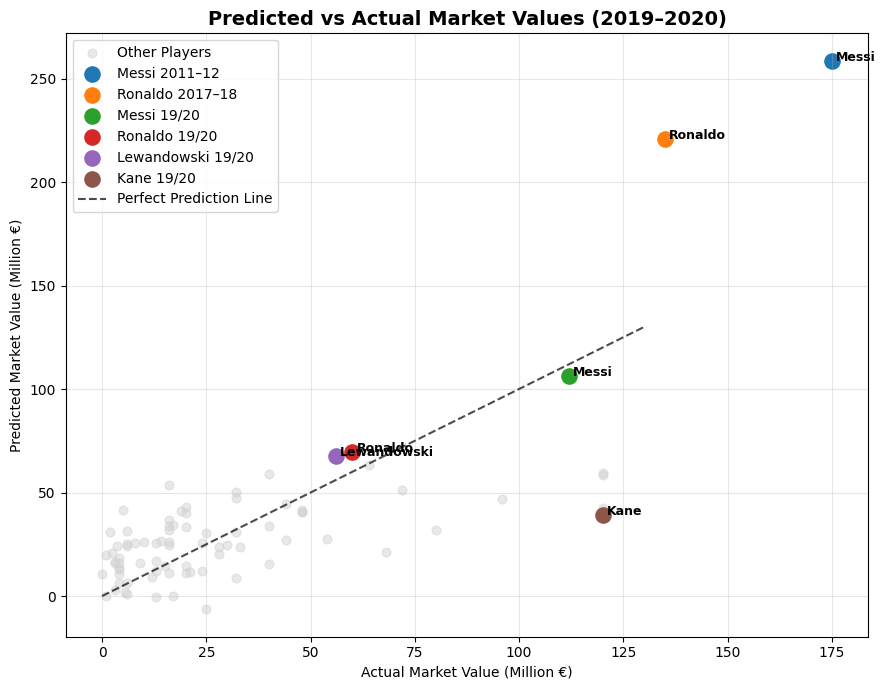

In [69]:

# Extract feature matrix
X = df[features].to_numpy()

# Normalize using training mean and std
X_norm = (X - mu) / sigma

# Predict using your trained linear regression model
y_pred = np.dot(X_norm, w_final) + b_final

# Store predictions (in millions)
df["predicted_value"] = y_pred / 1_000_000
df["actual_value"] = df["value"] / 1_000_000

# Define key players (highlighted)
highlight_players = {
    "Messi 2011–12": (175, 258.57),     
    "Ronaldo 2017–18": (135, 220.62),
    "Messi 19/20": (112, 106.10),
    "Ronaldo 19/20": (60, 69.69),
    "Lewandowski 19/20": (56, 67.70),
    "Kane 19/20": (120, 39.33)
}

# Plot
plt.figure(figsize=(9, 7))

# Scatter for all players
plt.scatter(df["actual_value"], df["predicted_value"], color='lightgray', alpha=0.5, s=40, label="Other Players")

# Highlight key players
for player, (actual, predicted) in highlight_players.items():
    plt.scatter(actual, predicted, s=120, label=player)
    plt.text(actual + 1, predicted, player.split()[0], fontsize=9, weight='bold')

# Perfect prediction line (y = x)
max_val = max(df["actual_value"].max(), df["predicted_value"].max()) + 10
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--', alpha=0.7, label="Perfect Prediction Line")

# Labels & Style
plt.title("Predicted vs Actual Market Values (2019–2020)", fontsize=14, weight='bold')
plt.xlabel("Actual Market Value (Million €)")
plt.ylabel("Predicted Market Value (Million €)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("plots/actual_vs_predicted+Messi2012andRonaldo2017.png", dpi=300, bbox_inches='tight')
plt.show()


In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:

y_test = df["value"].to_numpy()
X_norm = (X - mu) / sigma
y_pred = np.dot(X_norm, w_final) + b_final


# Example: compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Evaluation Metrics")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Model Evaluation Metrics
R² Score: 0.438
Mean Absolute Error (MAE): 15,841,811.81
Root Mean Squared Error (RMSE): 21,637,107.99
Mean Absolute Percentage Error (MAPE): 336.31%
